In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import glob
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

In [2]:
csv_files=glob.glob('data/AQMS'+'/*.csv')
df=pd.concat((pd.read_csv(f) for f in csv_files))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402960 entries, 0 to 52559
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Site                     402960 non-null  object 
 1   Species                  402960 non-null  object 
 2   ReadingDateTime          402960 non-null  object 
 3   Value                    202670 non-null  float64
 4   Units                    402960 non-null  object 
 5   Provisional or Ratified  402960 non-null  object 
dtypes: float64(1), object(5)
memory usage: 21.5+ MB


In [4]:
df.drop(['Species','Units','Provisional or Ratified'],axis=1,inplace=True)

In [5]:
df.groupby('Site').describe()

Value                                                       
       count       mean        std  min  25%   50%   75%        max
Site                                                               
BL0   8558.0  10.750888  10.112520 -3.3  4.7   7.6  12.7   92.40000
BQ9      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
BT4      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
BX9   7169.0  11.813182  10.972091 -3.8  5.3   7.9  13.8   88.10000
BY7      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
CD1   8544.0  11.132924  10.262592 -2.8  4.9   7.8  13.4   88.30000
CD9   8730.0  13.642887  10.411786 -7.3  7.2  10.9  16.3   83.90000
CE2      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
CR8   8711.0  10.115831   9.176507 -3.0  5.0   7.0  12.0   84.00000
CT2   8437.0  13.957568  10.865349 -3.0  8.0  11.0  16.0  441.00000
CT3   7575.0  11.669967  10.486332 -3.0  6.0   9.0  15.0  251.00000
GB0   8637.0  12.176705   9.036808 -1.2  6.7   9.4  14.1   79.80000
GN0   3193.0  11.319449   9.740894 -7.2  4.9   8.3  14.9   65.10000
GN3   8342.0  13.411832  11.277777 -3.5  6.8   9.6  15.5  109.40000
GN6   8252.0  10.966893   9.999743 -4.2  5.1   7.7  12.5   84.10000
GR4   8516.0  10.863269   9.913018 -2.7  5.2   8.0  12.5   97.60000
GR8      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
GR9   8713.0  10.425215  10.639660 -4.3  4.0   6.9  12.6   84.50000
HG1      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
HP1   8756.0   9.933029   9.987813  0.4  4.2   6.5  11.3   90.90000
HR1      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
HV1   8403.0  11.004820  12.916148 -9.0  4.5   7.8  13.5  472.20001
KC1   8723.0   9.579548   9.470490  0.4  4.2   6.3  11.0  121.00000
KF1   8723.0   9.578723   9.470523  0.4  4.1   6.4  11.0  121.00000
LH0   8510.0   9.538249   9.165456  0.4  4.1   6.3  11.2   91.00000
LW2   7742.0  14.953500  11.325410 -6.2  8.0  11.6  17.9   92.60000
LW5    411.0   8.671533   7.945340 -4.0  3.0   7.0  13.0   40.00000
MY7   7948.0  14.347974  10.963840 -3.3  7.5  11.4  17.5   93.00000
NM2      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
NM3      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
RB7   3399.0  11.471315  10.159918 -4.0  6.0   9.0  15.0  272.00000
RD0   3249.0   8.211480   8.305129 -5.0  3.0   6.0  11.0   80.00000
SK6      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
SK8      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
SK9      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
SKA      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
SKB      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
SKC      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
ST5   8648.0  11.718316  10.163471 -7.0  6.0   9.0  14.0   99.00000
TD5   8148.0  11.784892  14.797966  0.0  5.8   8.6  13.4  592.79999
TH4   6478.0  13.380195  11.332006 -5.3  6.5   9.7  16.1  152.30000
TK3   7940.0  11.548237  11.593650 -2.0  5.0   8.0  14.0  111.00000
TK9      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
TL6      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
WM0   2215.0  11.681716   9.942168  0.0  7.0   9.0  14.0  339.00000
WMD      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN

GN0, LW5, RB7, RD0, WM0 has too few data (less than half of the total amount)

In [6]:
# list of site codes with PM data
valid_AQMS=df.dropna()['Site'].unique().tolist()
for site in ['GN0','LW5','RB7','RD0','WM0']:
    valid_AQMS.remove(site)
df=df[df['Site'].isin(valid_AQMS)]
df=df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201480 entries, 0 to 201479
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Site             201480 non-null  object 
 1   ReadingDateTime  201480 non-null  object 
 2   Value            190203 non-null  float64
dtypes: float64(1), object(2)
memory usage: 4.6+ MB


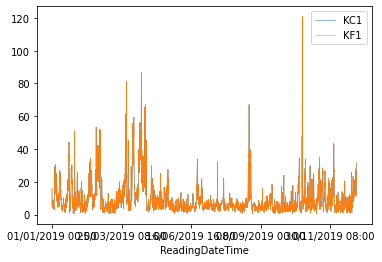

In [7]:
# KF1 and KC1 are very similar
fig,ax=plt.subplots()
df[df['Site']=='KC1'].plot(x='ReadingDateTime',y='Value',ax=ax,label='KC1',linewidth=0.5)
df[df['Site']=='KF1'].plot(x='ReadingDateTime',y='Value',ax=ax,label='KF1',linewidth=0.5)
plt.show()

In [8]:
# Remove KF1
df=df[df['Site']!='KF1']
valid_AQMS.remove('KF1')

In [9]:
len(df['Site'].unique())

22

In [10]:
df.groupby('Site').describe()

Value                                                       
       count       mean        std  min  25%   50%   75%        max
Site                                                               
BL0   8558.0  10.750888  10.112520 -3.3  4.7   7.6  12.7   92.40000
BX9   7169.0  11.813182  10.972091 -3.8  5.3   7.9  13.8   88.10000
CD1   8544.0  11.132924  10.262592 -2.8  4.9   7.8  13.4   88.30000
CD9   8730.0  13.642887  10.411786 -7.3  7.2  10.9  16.3   83.90000
CR8   8711.0  10.115831   9.176507 -3.0  5.0   7.0  12.0   84.00000
CT2   8437.0  13.957568  10.865349 -3.0  8.0  11.0  16.0  441.00000
CT3   7575.0  11.669967  10.486332 -3.0  6.0   9.0  15.0  251.00000
GB0   8637.0  12.176705   9.036808 -1.2  6.7   9.4  14.1   79.80000
GN3   8342.0  13.411832  11.277777 -3.5  6.8   9.6  15.5  109.40000
GN6   8252.0  10.966893   9.999743 -4.2  5.1   7.7  12.5   84.10000
GR4   8516.0  10.863269   9.913018 -2.7  5.2   8.0  12.5   97.60000
GR9   8713.0  10.425215  10.639660 -4.3  4.0   6.9  12.6   84.50000
HP1   8756.0   9.933029   9.987813  0.4  4.2   6.5  11.3   90.90000
HV1   8403.0  11.004820  12.916148 -9.0  4.5   7.8  13.5  472.20001
KC1   8723.0   9.579548   9.470490  0.4  4.2   6.3  11.0  121.00000
LH0   8510.0   9.538249   9.165456  0.4  4.1   6.3  11.2   91.00000
LW2   7742.0  14.953500  11.325410 -6.2  8.0  11.6  17.9   92.60000
MY7   7948.0  14.347974  10.963840 -3.3  7.5  11.4  17.5   93.00000
ST5   8648.0  11.718316  10.163471 -7.0  6.0   9.0  14.0   99.00000
TD5   8148.0  11.784892  14.797966  0.0  5.8   8.6  13.4  592.79999
TH4   6478.0  13.380195  11.332006 -5.3  6.5   9.7  16.1  152.30000
TK3   7940.0  11.548237  11.593650 -2.0  5.0   8.0  14.0  111.00000

In [11]:
# read in AQMS geometry
gdf=gpd.read_file('data/AQMS/AQMS.gpkg')
gdf.head()

C:\Users\Yulun\anaconda3\envs\sds2021\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,classification,dataowner,easting,latitude,longitude,northing,objectid,ozonepod,pollutant_co,pollutant_no2,...,pollutant_pm10,pollutant_pm25,pollutant_so2,siteid,sitemanager,sitename,sitetype,url,runtime,geometry
0,Airport,None,542525.2800145757,51.5028,0.0521,180203.16723543755,2,None,None,None,...,None,None,None,CAH,None,City Aviation House,The monitoring site is located on top of the b...,https://lcy.aqconsultants.co.uk/index.php/cah,08/29/2019,POINT (542525.241 180203.091)
1,Airport,None,542948.1357935619,51.5028,0.058193,180215.04111000145,3,None,None,None,...,None,None,None,KGV,None,King George V,The site measures PM10 and PM2.5 concentration...,https://lcy.aqconsultants.co.uk/index.php/kgv,08/29/2019,POINT (542948.097 180214.965)
2,Breathe London,None,535618.12376207381,51.521017999999998,-0.046672999999999999,182041.58454892109,72,No,None,None,...,None,None,None,2450071,None,"Beaumont Grove, Tower Hamlets",None,https://www.breathelondon.org/,08/29/2019,POINT (535618.087 182041.508)
3,Airport,None,542295.805364199,51.5074,0.049,180708.65635050513,1,None,None,None,...,None,None,None,ND,None,Newham Dockside,Ground level monitor. The site monitors NO2 an...,https://lcy.aqconsultants.co.uk/index.php/nd,08/29/2019,POINT (542295.767 180708.580)
4,Breathe London,None,524303.28797191242,51.604480000000002,-0.20649000000000001,191039.16036506533,4,No,None,None,...,None,None,None,2450001,None,"Dollis Road, Barnet",None,https://www.breathelondon.org/,08/29/2019,POINT (524303.254 191039.081)


In [12]:
gdf=gdf.loc[:,['latitude','longitude','siteid','sitename']]

gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   latitude   236 non-null    object
 1   longitude  236 non-null    object
 2   siteid     236 non-null    object
 3   sitename   236 non-null    object
dtypes: object(4)
memory usage: 7.5+ KB


In [13]:
# check if all sites with data are within the geometry dataframe
for elem in valid_AQMS:
    if elem not in gdf['siteid'].unique().tolist():
        print(elem)

TK3


**TK3**: Thurrock - Stanford-le-Hope

      51.518162000000, 0.4395480000000

**Thurrock** is not in London, so ignore

In [14]:
valid_AQMS.remove('TK3')
df=df[df['Site']!='TK3']

In [15]:
len(valid_AQMS)

21

In [16]:
len(df['Site'].unique())

21

In [17]:
AQMS_gdf=gdf[gdf['siteid'].isin(valid_AQMS)]
AQMS_gdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 115 to 232
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   latitude   21 non-null     object
 1   longitude  21 non-null     object
 2   siteid     21 non-null     object
 3   sitename   21 non-null     object
dtypes: object(4)
memory usage: 840.0+ bytes


In [18]:
AQMS_gdf=AQMS_gdf.astype({'latitude':'float64','longitude':'float64','siteid':'string','sitename':'string'})
AQMS_gdf.dtypes

latitude     float64
longitude    float64
siteid        string
sitename      string
dtype: object

In [19]:
AQMS_gdf = gpd.GeoDataFrame(AQMS_gdf,
                            geometry=gpd.points_from_xy(AQMS_gdf.longitude, AQMS_gdf.latitude),
                            crs='EPSG:4326')

In [20]:
AQMS_gdf=AQMS_gdf.to_crs(27700)
AQMS_gdf=AQMS_gdf.drop(['latitude','longitude'],axis=1)

In [21]:
AQMS_gdf.to_file('data/AQMS_loc.shp')

------
**Geometry of sites saved.**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183960 entries, 0 to 201479
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Site             183960 non-null  object 
 1   ReadingDateTime  183960 non-null  object 
 2   Value            173540 non-null  float64
dtypes: float64(1), object(2)
memory usage: 5.6+ MB


In [23]:
df['Value'].describe()

count    173540.000000
mean         11.721337
std          10.793000
min          -9.000000
25%           5.400000
50%           8.600000
75%          14.000000
max         592.799990
Name: Value, dtype: float64

There are many null values and negative values (not efficient because PM readings cannot be negative)

According to [this](https://www.researchgate.net/publication/237537115_Estimation_of_missing_values_in_air_pollution_data_using_single_imputation_techniques), using mean-before-after is an approach.

In [24]:
df['Value']=df['Value'].where(df['Value']>0, np.nan)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183960 entries, 0 to 201479
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Site             183960 non-null  object 
 1   ReadingDateTime  183960 non-null  object 
 2   Value            172113 non-null  float64
dtypes: float64(1), object(2)
memory usage: 5.6+ MB


In [26]:
val=df['Value'].values.copy()

In [27]:
sum(val<=0),sum(np.isnan(val))

(0, 11847)

In [28]:
imp=SimpleImputer(strategy='mean')
val=val.reshape(-1,1)
val=imp.fit_transform(val)

In [29]:
sum(val<=0),sum(np.isnan(val))

(array([0]), array([0]))

In [30]:
df['Value']=val

In [31]:
df.describe()

,Value
count,183960.000000
mean,11.827605
std,10.420745
min,0.100000
25%,5.800000
50%,9.000000
75%,13.500000
max,592.799990


In [32]:
df['DateTime']=pd.to_datetime(df['ReadingDateTime'])

In [33]:
df.drop('ReadingDateTime',axis=1,inplace=True)
df.to_csv('data/hourly.csv',index=False)

In [34]:
daily=pd.DataFrame()
for site in valid_AQMS:
    temp=df[df['Site']==site].groupby(pd.Grouper(key='DateTime',freq='D')).mean()
    temp['Site']=site
    daily=daily.append(temp)
daily=daily.reset_index()
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7665 entries, 0 to 7664
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  7665 non-null   datetime64[ns]
 1   Value     7665 non-null   float64       
 2   Site      7665 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 179.8+ KB


In [35]:
daily.to_csv('data/daily.csv',index=False)

In [36]:
df['month']=df['DateTime'].dt.month

<AxesSubplot:xlabel='month'>

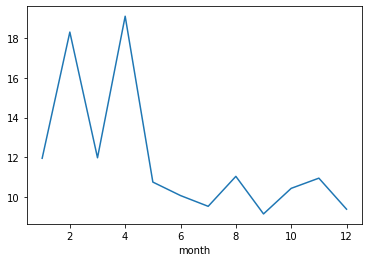

In [37]:
df.groupby('month').mean()['Value'].plot()

In [38]:
df['week']=df['DateTime'].dt.isocalendar().week

<AxesSubplot:xlabel='week'>

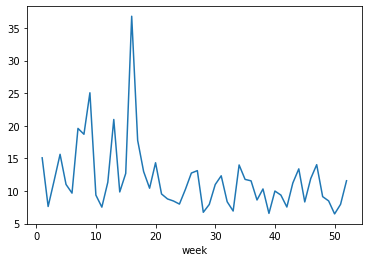

In [39]:
df.groupby('week').mean()['Value'].plot()

In [40]:
's'*False

''